In [1]:
# マルコフ連載とは？
# 遷移の確率が完全に現在の状態にのみ依存し、前のシーケンスの状態には依存しないことをマルコフ性という
# このような性質を満たす確率変数をマルコフ連鎖という
# 要するに、現在の状態(Xn)から未来の状態(Xn+1)を推測するということ。そのために過去の状態(X0, X1,..Xn-1)は加味しないことを意味する
# Xnがとる値の空間のことを状態空間ともいう

In [7]:
# 具体例 天気の予測

import numpy as np
import random as rm

states = ["sunny", "rainy"]
transitions = [["SS", "SR"],["RS", "RR"]] # S=sunny, R=rainnyでSSはsunny->sunnyとなる状態遷移
T = [[0.9, 0.1],[0.5, 0.5]] # transitionsの各要素に対応する確率行列

# 現在の天気
today_weather = "sunny"

# 予測したい日数
forcast_days = 5

# マルコフ連鎖に基づいて計算
# 現在の天気と上の遷移確率に基づいて推測
weather_list = []
n_days = 0
prob = 1.0
while n_days != forcast_days:
    if today_weather == "sunny":
        change = np.random.choice(transitions[0], p=T[0])
        if change == "SS":
            prob = prob * T[0][0]
            weather_list.append(states[0])
        else:
            prob = prob * T[0][1]
            weather_list.append(states[1])            
    else:
        change = np.random.choice(transitions[1], p=T[1])
        if change == "RS":
            prob = prob * T[1][0]
            weather_list.append(states[0])
        else:
            prob = prob * T[1][1]
            weather_list.append(states[1])        
    n_days+=1

weather_list

['sunny', 'sunny', 'sunny', 'sunny', 'sunny']

In [8]:
# 上記の具体例では5日間の要素について確認したが、このように有限個の連鎖からなるマルコフ連鎖を「有限マルコフ連鎖」という
# mステップ先の各状態遷移パターンを行列で表現したものを推移確立行列という。
# 各行成分の和は1となり、確率行列(状態確率ベクトル)ともいう
# 0ステップ時の確率ベクトルのことは初期分布という

In [12]:
# 具体例 じゃんけんの推移確率行列(m=2)

import numpy as np

transition_matrix = np.zeros([3,3])

# 0: rock, 1:scissors, 2:paper
transition_matrix[0,0] = 0.4
transition_matrix[0,1] = 0.3
transition_matrix[0,2] = 0.3
transition_matrix[1,0] = 0.6
transition_matrix[1,1] = 0.1
transition_matrix[1,2] = 0.3
transition_matrix[2,0] = 0.5
transition_matrix[2,1] = 0.2
transition_matrix[2,2] = 0.3
transition_matrix

array([[0.4, 0.3, 0.3],
       [0.6, 0.1, 0.3],
       [0.5, 0.2, 0.3]])

In [13]:
# 定常分布とは？
# 「一度その状態に入ったら、ずっとその状態であり続ける」ような分布。
# 無限にステップを重ねった結果、状態確率(ベクトル)が収束した状態
# 初期状態が定常分布なマルコフ連鎖のことを「定常マルコフ連鎖」という

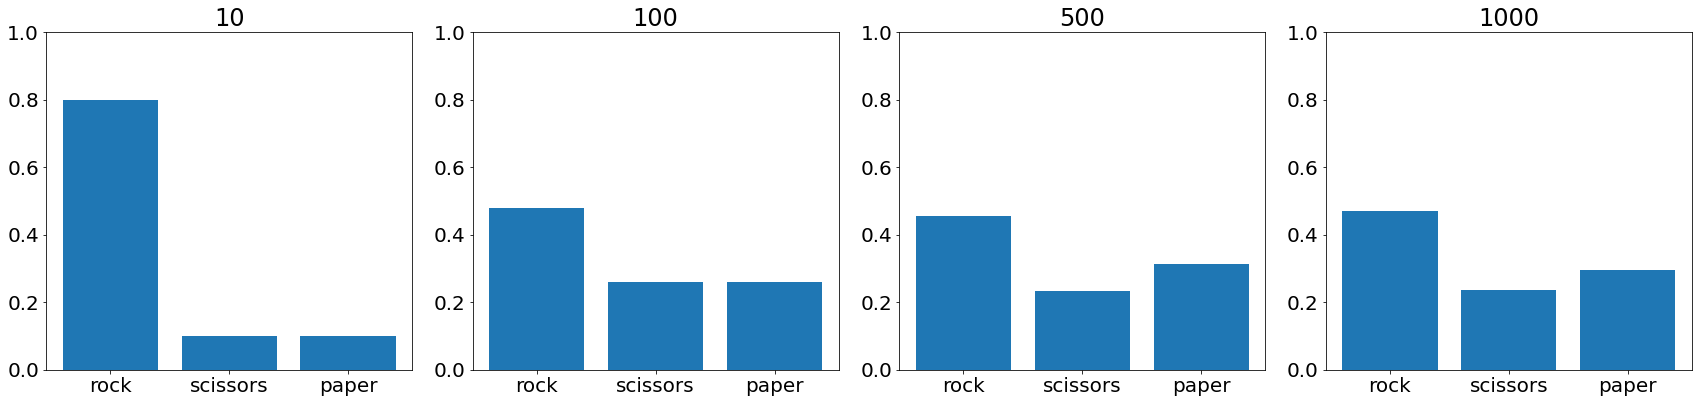

In [16]:
# 具体例 じゃんけん

import numpy as np
import matplotlib.pyplot as plt

transition_matrix = np.zeros([3,3])

# 0: rock, 1:scissors, 2:paper
transition_matrix[0,0] = 0.4
transition_matrix[0,1] = 0.3
transition_matrix[0,2] = 0.3
transition_matrix[1,0] = 0.6
transition_matrix[1,1] = 0.1
transition_matrix[1,2] = 0.3
transition_matrix[2,0] = 0.5
transition_matrix[2,1] = 0.2
transition_matrix[2,2] = 0.3

# 500回試行する
T = 1000
np.random.seed(1)

# rockを初期状態として計算
h_init = 0
h_arr = [h_init]
h = h_init
for i in range(T):
    h = np.random.choice(3,1,p=transition_matrix[h,:])[0]
    h_arr.append(h)

# グラフに描画
hist1, bin1 = np.histogram(h_arr[:10],bins=np.arange(4),density=True)
hist2, bin2 = np.histogram(h_arr[:100],bins=np.arange(4),density=True)
hist3, bin3 = np.histogram(h_arr[:500],bins=np.arange(4),density=True)
hist4, bin4 = np.histogram(h_arr[:T],bins=np.arange(4),density=True)

plt.rcParams["font.size"] = 20
hands_label = ['rock','scissors','paper']

plt.figure(figsize=(24,6))
plt.subplot(1,4,1)
plt.bar(hands_label,hist1)
plt.ylim([0, 1])
plt.title('10')

plt.subplot(1,4,2)
plt.bar(hands_label,hist2)
plt.ylim([0, 1])
plt.title('100')

plt.subplot(1,4,3)
plt.bar(hands_label,hist3)
plt.ylim([0, 1])
plt.title('500')

plt.subplot(1,4,4)
plt.bar(hands_label,hist4)
plt.ylim([0, 1])
plt.title('1000')

plt.tight_layout()
plt.show()

# 回数を重ねるごとに分布の形の変化が小さくなっている=収束していることがわかる
# 十分に時間が経過したとき、とりあえずグーを出し続ければ勝つ確率が高いと言える

In [17]:
# また、固有値1の固有ベクトルの和が1となるように規格化すると定常分布を求めることができる

import numpy.linalg as LA
w, v = LA.eig(transition_matrix.T)
v[:,0]/sum(v[:,0]) # 概ね上記のグラフの値と一致する

array([0.475, 0.225, 0.3  ])